# STOR 535: Lab1
### Submit the PDF version of this homework to gradescope by Feb 4

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

### Problem 1 (50 points)


- 1.1  Use NumPy  to create a list (e.g., flips) representing one sequence of 100 coin flips.

Print out this sequence so you can observe the random pattern of heads ('H') and tails ('T').

Set random seed as 1.

In [78]:
np.random.seed(1)
flips = np.random.choice(["H", "T"], (1,100))[0]
flips

array(['T', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'H',
       'T', 'T', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'H',
       'H', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'H', 'H',
       'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T',
       'H', 'H', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'H', 'T',
       'T', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'H', 'T', 'T',
       'T', 'H', 'T', 'H', 'H', 'T', 'T', 'H', 'T', 'T', 'H', 'T', 'H',
       'H', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'T'], dtype='<U1')

- 1.2 

Using the single sequence generated in Part A, check if there is a streak (run) of 5 or more consecutive heads or 5 or more consecutive tails.
Print a statement indicating whether or not such a streak was found in that sequence.

In [84]:
def consecutiveString(arr, str, num):
    count = 0
    for i in arr:

        if (i == str):
            count += 1
        else:
            count = 0

        if(count >= num):
            return True
    
    return False
        

In [88]:
print("Are there a streak of 5 or more heads?")
print(consecutiveString(flips, "H", 5))
print("Are there a streak of 5 or more tails?")
print(consecutiveString(flips, "T", 5))
print(flips)

Are there a streak of 5 or more heads?
False
Are there a streak of 5 or more tails?
True
['T' 'T' 'H' 'H' 'T' 'T' 'T' 'T' 'T' 'H' 'H' 'T' 'H' 'T' 'T' 'H' 'H' 'T'
 'H' 'H' 'H' 'T' 'H' 'H' 'T' 'H' 'H' 'H' 'T' 'H' 'H' 'H' 'T' 'T' 'T' 'T'
 'T' 'H' 'H' 'H' 'T' 'T' 'T' 'T' 'T' 'T' 'H' 'T' 'T' 'H' 'H' 'T' 'H' 'H'
 'T' 'T' 'T' 'H' 'T' 'H' 'H' 'T' 'T' 'H' 'T' 'T' 'T' 'T' 'H' 'H' 'T' 'T'
 'H' 'H' 'H' 'H' 'T' 'T' 'T' 'H' 'T' 'H' 'H' 'T' 'T' 'H' 'T' 'T' 'H' 'T'
 'H' 'H' 'T' 'T' 'T' 'H' 'T' 'T' 'H' 'T']


- 1.3
Estimate the probability of seeing at least one run of 5 identical outcomes in 100 flips by running 10,000 simulations:

For each simulation, generate 100 coin flips and check for a run of 5 or more consecutive heads or tails.
Count how many trials contain at least one run of length 5 or more.

Calculate the fraction of those trials. That fraction is your empirical probability estimate.

In [90]:
roundsconsecutive = 0
for i in range(10000):
    flips = np.random.choice(["H", "T"], (1,100))[0]
    if(consecutiveString(flips, "H", 5) or consecutiveString(flips, "T", 5)):
        roundsconsecutive += 1

probability = roundsconsecutive/10000

- 1.4

Report the probability you found in Part 1.3. Is it larger than 95% or smaller than 95%?

In [92]:
print("The probability is " + str(probability))
print("It is " + str(probability > .95) + " that the probability is greater than .95 or 95%")

The probability is 0.9733
It is True that the probability is greater than .95 or 95%


- 1.5 Modify the number of coin flips per trial from 100 to an integer 𝑘. Create a line plot to visualize how the probability changes as 𝑘 varies between 10 and 100.

x-axis represents the value of 𝑘, 𝑘=10,11,12,...,100.


y-axis represents the fraction of trials (out of 10,000 simulations) where at least 5 consecutive Heads or Tails occur.

Describe your observations from this plot.

In [93]:
def plotprobabilitymaker(k):
    roundsconsecutive = 0
    for i in range(10000):
        flips = np.random.choice(["H", "T"], (1,k))[0]
        if(consecutiveString(flips, "H", 5) or consecutiveString(flips, "T", 5)):
            roundsconsecutive += 1

    return roundsconsecutive/10000

In [97]:
x = np.arange(1, 100)
y = [plotprobabilitymaker(i) for i in x]


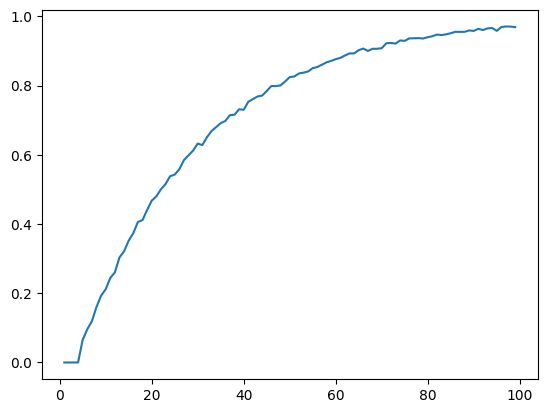

In [100]:
plt.plot(x, y)
plt.show()

## OBSERVATIONS

It seems as though that it kind of follows a logarithmic curve. It seems around 20 flips it becomes increasingly apparant that we will have a simulation where we get either 5 heads or 5 tails or both of the situations.

## Problem 2 (20 points)

A “norepeatword” is a sequence of at least one (and possibly all) of the usual 26 letters a,b,c,. . . ,z, with repetitions not allowed. For example, “course” is a norepeatword, but “statistics” is not. Order matters, e.g., “course” is not the same as “source”.


Let $k$ represent the length of the norepeatword.

- 2.1 For a fixed length fixed length $k=10$, use python to calculate how many norepeatwords are there?

- 2.2 What is the maximum value of $k$?

- 2.3 Calculate the total number of norepeatwords for all possible values of $k$.

- 2.4 Suppose that a norepeatword is chosen randomly, with all norepeatwords equally likely, i.e., we choose one norepeatword among all norepeatwords “with equal likelihood.” Calculate the probability that the chosen norepeatword has length 26 and uses every letter.

- 2.5 Calculate the value of $1/e$, where constant $e$ represents the base of the natural logarithm. Calculate the difference between the probability in problem `2.4` and $1/e$. What do you observe? 


Hint: You can use `math.e` to get the value of $e$.  You can refer to Problem 4 on this [webpage](https://projects.iq.harvard.edu/sites/projects.iq.harvard.edu/files/stat110/files/strategic_practice_and_homework_1.pdf).

In [110]:
print("ALLL MY WORK")
print("2.1")
print("There would be " + str(math.factorial(26)/(math.factorial(26-10))) + " words")
print("2.2")
print("The Maximum value of k would be 26 because then letters would repeat")
print("2.3")
totalvals = 0
for k in range(1, 27):
    totalvals += math.factorial(26)/(math.factorial(26-k))
print("There would be " + str(totalvals) + " words")
print("2.4")
print("The probability would be " + str(math.factorial(26)/totalvals))
print("2.5")
print("1/e is: " + str(1/math.e))
print("The difference between 1/e and 2.4's value is " + str(1/math.e - math.factorial(26)/totalvals ))
print("We can observe there is a super super small difference between the two values. Which is super cool to see")

ALLL MY WORK
2.1
There would be 19275223968000.0 words
2.2
The Maximum value of k would be 26 because then letters would repeat
2.3
There would be 1.0962598503531496e+27 words
2.4
The probability would be 0.3678794411714423
2.5
1/e is: 0.36787944117144233
The difference between 1/e and 2.4's value is 5.551115123125783e-17
We can observe there is a super super small difference between the two values. Which is super cool to see


## Problem 3 (15 points)

You have a 6-sided die, but it is unbalanced. Instead of each face {1,2,3,4,5,6} having probability $1/6$, the probabilities are `[0.05, 0.1, 0.3, 0.2, 0.05, 0.3]`.


- 3.1 Set random seed in numpy as 1, and simulate rolling this unbalanced die 1,000 times. Print out the sequence of these 1000 outcome.
- 3.2 Calculate the empirical frequencies of rolling 1,2,3,4,5,6 based on your outcome.

- 3.3 Copmare it to the true probability $[0.05, 0.1, 0.3, 0.2, 0.05, 0.3]$. Explain your answers in words.

In [126]:
print(3.1)
np.random.seed(1)
dice = np.random.choice([1,2,3,4,5,6], (1,1000), p=[0.05, 0.1, 0.3, 0.2, 0.05, 0.3])[0]
print(dice)
print(3.2)
unique, counts = np.unique(dice, return_counts=True)
nums = dict(zip(unique, counts))
for i in range(1, 7):
    probability = nums[i]/len(dice)
    print("Empiracal Probability for " + str(i)+ " is " + str(probability))
print(3.3)
print("The empiracal probabilities seemed close to the calculated probabilities. \nFor 1 , 4 and 5 it was over and for 2, 3, 6 it was under the calculated probability")


3.1
[3 6 1 3 2 2 3 3 3 4 3 5 3 6 1 5 3 4 2 3 6 6 3 5 6 6 2 1 3 6 2 3 6 4 5 3 5
 6 1 6 6 6 3 6 2 3 6 3 3 2 1 5 3 3 4 2 4 2 4 5 2 3 5 3 1 4 5 4 6 4 6 2 2 6
 3 3 6 3 6 6 6 4 6 3 3 6 3 6 5 4 2 6 3 4 3 3 6 4 1 4 3 4 6 3 6 4 1 6 5 6 3
 2 6 5 2 6 6 6 6 2 1 1 1 3 6 4 4 6 2 3 4 6 4 1 6 3 6 3 6 6 4 2 2 2 1 2 3 6
 4 1 2 6 4 3 3 6 3 4 6 6 3 4 4 6 3 1 2 4 4 4 3 6 4 3 4 6 5 3 2 3 4 3 6 2 3
 6 3 4 4 6 3 2 6 6 6 6 1 3 4 6 6 4 6 4 3 4 4 4 6 6 3 6 3 2 2 4 1 6 6 1 3 3
 2 6 3 6 4 6 6 6 4 4 6 3 4 4 1 4 3 6 3 6 4 3 6 4 2 3 5 6 1 6 3 6 4 6 4 4 3
 4 6 6 6 5 6 3 5 4 3 3 3 3 4 3 6 5 3 3 3 6 6 6 5 3 3 6 4 6 4 6 4 6 4 4 3 2
 3 2 6 3 6 6 5 4 3 4 3 3 4 3 6 6 3 2 3 4 6 3 3 6 3 4 3 2 4 4 3 4 4 5 2 6 3
 4 6 1 3 6 6 4 6 6 6 6 2 5 6 4 6 1 6 6 3 3 4 3 6 3 6 6 3 2 6 4 6 4 6 4 4 2
 3 1 3 6 1 3 6 5 5 3 3 4 6 3 3 3 6 4 2 4 3 6 3 1 4 6 3 6 4 4 6 6 1 6 4 6 3
 3 2 3 2 4 6 5 6 3 6 3 6 4 2 2 1 2 4 2 1 6 3 6 4 4 4 4 6 3 6 1 6 2 4 1 4 1
 6 6 6 6 2 3 3 4 6 6 6 6 6 3 3 3 2 6 2 3 6 3 6 3 4 3 6 3 3 4 6 1 6 6 1 4 3
 6 4 5 4 4 3 1 4 3 4 

## Problem 4 (15 points)

A knock-out tournament is being held with $2^n$ tennis players. This means that for each round, the winners move on to the next round and the losers are eliminated, until only one person remains. For example, if initially there are $2^4$ = 16 players, then there are 8 games in the first round, then the 8 winners move on to round 2, then the 4 winners move on to round 3, then the 2 winners move on to round 4, the winner of which is declared the winner of the tournament. (There are various systems for determining who plays whom within a round, but these do not matter for this problem.) 


- 4.1 Suppose there are 32 players. You have a 80% probability of winning each game. What is the probability that you become the champion?

- 4.2 Repeat Problem 4.1 but now you have 90% probability of winning each game.

- 4.3 Create a line plot where the x-axis represents the probability of winning each game and the y-axis represents the probability of becoming the champion.

In [131]:
def getpredictedwin(numofplayers, winprediction):
    rounds = math.log2(numofplayers)
    return math.pow(winprediction, rounds)

In [133]:
print("4.1")
print("With 80% probability, to be champion you have probability of " + str(getpredictedwin(32, .8)))
print("4.2")
print("With 90% probability, to be champion you have probability of " + str(getpredictedwin(32, .9)))

4.1
With 80% probability, to be champion you have probability of 0.3276800000000001
4.2
With 90% probability, to be champion you have probability of 0.5904900000000001


4.3


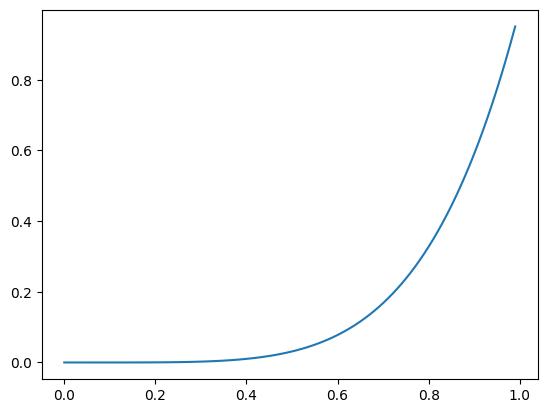

In [142]:
print("4.3")
x = np.arange(0, 1, .01)
y = [getpredictedwin(32, i) for i in x]
plt.plot(x, y)
plt.show()
